In [1]:
from sentence_transformers import CrossEncoder

model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L6-v2')
scores = model.predict([
    ("How many people live in Berlin?", "Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers."),
    ("How many people live in Berlin?", "Berlin is well known for its museums."),
])
print(scores)
# [ 8.607138 -4.320078]

c:\Users\mokrota\Documents\GitHub\math_problem_recommender\math_problem_recommender\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


[ 8.607139 -4.320077]


In [2]:
"""
This is a more complex example on performing clustering on large scale dataset.

This examples find in a large set of sentences local communities, i.e., groups of sentences that are highly
similar. You can freely configure the threshold what is considered as similar. A high threshold will
only find extremely similar sentences, a lower threshold will find more sentence that are less similar.

A second parameter is 'min_community_size': Only communities with at least a certain number of sentences will be returned.

The method for finding the communities is extremely fast, for clustering 50k sentences it requires only 5 seconds (plus embedding computation).

In this example, we download a large set of questions from Quora and then find similar questions in this set.
"""

import csv
import os
import time

from sentence_transformers import SentenceTransformer, util

# Model for computing sentence embeddings. We use one trained for similar questions detection
model = SentenceTransformer("all-MiniLM-L6-v2")

# We download the Quora Duplicate Questions Dataset (https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs)
# and find similar question in it
url = "http://qim.fs.quoracdn.net/quora_duplicate_questions.tsv"
dataset_path = "quora_duplicate_questions.tsv"
max_corpus_size = 50000  # We limit our corpus to only the first 50k questions


# Check if the dataset exists. If not, download and extract
# Download dataset if needed
if not os.path.exists(dataset_path):
    print("Download dataset")
    util.http_get(url, dataset_path)

# Get all unique sentences from the file
corpus_sentences = set()
with open(dataset_path, encoding="utf8") as fIn:
    reader = csv.DictReader(fIn, delimiter="\t", quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        corpus_sentences.add(row["question1"])
        corpus_sentences.add(row["question2"])
        if len(corpus_sentences) >= max_corpus_size:
            break

corpus_sentences = list(corpus_sentences)
print("Encode the corpus. This might take a while")
def cluster(corpus_sentences, model, min_community_size=25, threshold=0.75):
    corpus_embeddings = model.encode(corpus_sentences, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

    print("Start clustering")
    start_time = time.time()

    # Two parameters to tune:
    # min_cluster_size: Only consider cluster that have at least 25 elements
    # threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
    clusters = util.community_detection(corpus_embeddings, min_community_size=min_community_size, threshold=threshold)

    print(f"Clustering done after {time.time() - start_time:.2f} sec")
    return clusters

Encode the corpus. This might take a while


In [3]:
import pandas as pd
import os

benchmark = pd.read_csv(os.path.abspath("benchmark\\andreescu-andrica-problems-on-number-theory\\benchmark_v1.csv"))

In [4]:
import ast

benchmark["Problem&Solution"] = benchmark["Problem&Solution"].apply(lambda x: ast.literal_eval(x))

In [5]:
clusters_gt = benchmark["Problem&Solution"].tolist()
clusters_gt

[['Problem. Prove that there are infinitely many even positive integers $k$ such that the equation $\\varphi(n)=k$ has no solution.  \n\n(Schinzel4)  \n\nSolution. Take $k=2\\cdot7^{m}$ , $m\\geq1$ . If $n=p_{1}^{\\alpha_{1}}\\ldots{}p_{h}^{\\alpha_{h}}$ , then  \n\n$$\n\\begin{array}{l}{\\varphi(n)=p_{1}^{\\alpha_{1}}\\left(1-\\frac{1}{p_{1}}\\right)\\cdot\\cdot\\cdot p_{h}^{\\alpha_{h}}\\left(1-\\frac{1}{p_{h}}\\right)}\\\\ {=p_{1}^{\\alpha_{1}-1}\\cdot\\cdot\\cdot p_{h}^{\\alpha_{h}-1}(p_{1}-1)\\cdot\\cdot\\cdot(p_{h}-1).}\\end{array}\n$$  \n\nIf at least two of the primes $p_{1},\\ldots,p_{h}$ are odd, then $4|\\varphi(n)$ and $\\varphi(n)\\neq k$ . If $n=2^{\\alpha}p^{\\beta}$ , with $p\\geq3$ , then  \n\n$$\n\\varphi(n)=2^{\\alpha}p^{\\beta}\\left(1-\\frac{1}{2}\\right)\\left(1-\\frac{1}{p}\\right)=2^{\\alpha-1}p^{\\beta-1}(p-1).\n$$  \n\nIn this case the equality $\\varphi(n)=k$ is also impossible.  \n\n',
  'Problem. Prove that there are infinitely many positive integers $n$ su

In [6]:
benchmark = benchmark.explode("Problem&Solution", ignore_index=True)
benchmark

,TopicMetadata,Problem&Solution
0,(Arithmetic Functions)->(Euler’s totient funct...,Problem. Prove that there are infinitely many ...
1,(Arithmetic Functions)->(Euler’s totient funct...,Problem. Prove that there are infinitely many ...
2,(Arithmetic Functions)->(Euler’s totient funct...,Problem. If $n$ is a composite positive intege...
3,(Arithmetic Functions)->(Euler’s totient funct...,"Problem. For any positive integer $n$ , $n\neq..."
4,(Arithmetic Functions)->(Euler’s totient funct...,"Problem. For a positive integer $n$ , let $\ps..."
...,...,...
411,(Some special problems in number theory)->(Spe...,Problem. Let $p$ be a prime of the form $4k+3$...
412,(Some special problems in number theory)->(Spe...,Problem. Let $P^{*}$ denote all the odd primes...
413,(Some special problems in number theory)->(Spe...,Problem. Show that any even perfect number is ...
414,(Some special problems in number theory)->(Spe...,Problem. Prove that if $n$ is an even perfect ...


In [7]:
problem_solution = benchmark["Problem&Solution"].tolist()
problem_solution

['Problem. Prove that there are infinitely many even positive integers $k$ such that the equation $\\varphi(n)=k$ has no solution.  \n\n(Schinzel4)  \n\nSolution. Take $k=2\\cdot7^{m}$ , $m\\geq1$ . If $n=p_{1}^{\\alpha_{1}}\\ldots{}p_{h}^{\\alpha_{h}}$ , then  \n\n$$\n\\begin{array}{l}{\\varphi(n)=p_{1}^{\\alpha_{1}}\\left(1-\\frac{1}{p_{1}}\\right)\\cdot\\cdot\\cdot p_{h}^{\\alpha_{h}}\\left(1-\\frac{1}{p_{h}}\\right)}\\\\ {=p_{1}^{\\alpha_{1}-1}\\cdot\\cdot\\cdot p_{h}^{\\alpha_{h}-1}(p_{1}-1)\\cdot\\cdot\\cdot(p_{h}-1).}\\end{array}\n$$  \n\nIf at least two of the primes $p_{1},\\ldots,p_{h}$ are odd, then $4|\\varphi(n)$ and $\\varphi(n)\\neq k$ . If $n=2^{\\alpha}p^{\\beta}$ , with $p\\geq3$ , then  \n\n$$\n\\varphi(n)=2^{\\alpha}p^{\\beta}\\left(1-\\frac{1}{2}\\right)\\left(1-\\frac{1}{p}\\right)=2^{\\alpha-1}p^{\\beta-1}(p-1).\n$$  \n\nIn this case the equality $\\varphi(n)=k$ is also impossible.  \n\n',
 'Problem. Prove that there are infinitely many positive integers $n$ such

In [8]:
clusters_ids_pred = cluster(problem_solution, model, min_community_size=1)
clusters_ids_pred

Batches: 100%|██████████| 7/7 [00:00<00:00, 15.42it/s]

Start clustering
Clustering done after 0.07 sec


[[232, 230, 231, 237, 229],
 [34, 35, 36, 33],
 [95, 88, 87],
 [275, 285, 366],
 [293, 294, 290],
 [25, 32],
 [43, 62],
 [45, 86],
 [58, 394],
 [75, 85],
 [109, 332],
 [214, 216],
 [233, 235],
 [271, 286],
 [312, 313],
 [355, 361],
 [387, 402],
 [291],
 [365],
 [0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [44],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [59],
 [60],
 [61],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 

In [9]:
benchmark.reset_index()

,index,TopicMetadata,Problem&Solution
0,0,(Arithmetic Functions)->(Euler’s totient funct...,Problem. Prove that there are infinitely many ...
1,1,(Arithmetic Functions)->(Euler’s totient funct...,Problem. Prove that there are infinitely many ...
2,2,(Arithmetic Functions)->(Euler’s totient funct...,Problem. If $n$ is a composite positive intege...
3,3,(Arithmetic Functions)->(Euler’s totient funct...,"Problem. For any positive integer $n$ , $n\neq..."
4,4,(Arithmetic Functions)->(Euler’s totient funct...,"Problem. For a positive integer $n$ , let $\ps..."
...,...,...,...
411,411,(Some special problems in number theory)->(Spe...,Problem. Let $p$ be a prime of the form $4k+3$...
412,412,(Some special problems in number theory)->(Spe...,Problem. Let $P^{*}$ denote all the odd primes...
413,413,(Some special problems in number theory)->(Spe...,Problem. Show that any even perfect number is ...
414,414,(Some special problems in number theory)->(Spe...,Problem. Prove that if $n$ is an even perfect ...


In [10]:
benchmark = benchmark.reset_index().groupby("TopicMetadata")[["index", "Problem&Solution"]].agg(list)
benchmark

,index,Problem&Solution
TopicMetadata,,
(Arithmetic Functions)->(Euler’s totient function),"[0, 1, 2, 3, 4, 5, 6]",[Problem. Prove that there are infinitely many...
(Arithmetic Functions)->(Exponent of a prime and Legendre’s formula),"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]",[Problem. Let $p$ be a prime. Find the exponen...
(Arithmetic Functions)->(Multiplicative functions),"[17, 18, 19, 20, 21, 22, 23, 24]",[Problem. 1) Prove that the convolution produc...
(Arithmetic Functions)->(Number of divisors),"[25, 26, 27, 28, 29, 30, 31]",[Problem. For any $n\geq2$ \n\n$$\n\tau(n)=\s...
(Arithmetic Functions)->(Sum of divisors),"[32, 33, 34, 35, 36, 37, 38]","[Problem. For any $n\geq2$ , \n\n$$\n\sigma(n..."
(Basic Principles in Number Theory)->(Inclusion-exclusion),"[39, 40]","[Problem. Let $S=\{1,2,3,\ldots,280\}$ . Find ..."
(Basic Principles in Number Theory)->(Infinite descent),"[41, 42]","[Problem. Find all triples $(x,y,z)$ of nonneg..."
(Basic Principles in Number Theory)->(Mathematical induction),"[43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]","[Problem. Prove that, for any integer $n\geq2$..."
(Basic Principles in Number Theory)->(Two simple principles),"[54, 55, 56, 57, 58]",[Problem. Let $n_{1}<n_{2}<\cdots<n_{2000}<10^...


In [11]:
clusters_ids_gt = benchmark['index'].tolist()
clusters_ids_gt

[[0, 1, 2, 3, 4, 5, 6],
 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [17, 18, 19, 20, 21, 22, 23, 24],
 [25, 26, 27, 28, 29, 30, 31],
 [32, 33, 34, 35, 36, 37, 38],
 [39, 40],
 [41, 42],
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
 [54, 55, 56, 57, 58],
 [59, 60, 61],
 [62, 63, 64],
 [65, 66, 67, 68],
 [69, 70, 71, 72, 73, 74],
 [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86],
 [87, 88, 89, 90, 91, 92],
 [93, 94, 95, 96, 97, 98, 99],
 [100, 101, 102, 103, 104, 105],
 [106, 107, 108, 109, 110, 111, 112, 113],
 [114, 115, 116, 117, 118, 119, 120],
 [121, 122, 123, 124, 125],
 [126],
 [127, 128],
 [129, 130, 131, 132],
 [133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151],
 [152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163],
 [164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175],
 [176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186],
 [187, 188, 189, 190, 191, 192, 193, 194],
 [195,
  196,
 

In [12]:
corpus_embeddings = model.encode(problem_solution)
corpus_embeddings, len(corpus_embeddings)

(array([[-0.0111458 ,  0.05379145,  0.00557957, ...,  0.07720771,
          0.02607944,  0.06678001],
        [ 0.00381612, -0.03083564, -0.03697248, ..., -0.00819314,
         -0.02472658,  0.02392355],
        [ 0.02104284, -0.01368313,  0.05478206, ...,  0.03677323,
         -0.02350022,  0.0360966 ],
        ...,
        [ 0.0172599 ,  0.10063468, -0.016157  , ...,  0.04661788,
         -0.01645989,  0.00689929],
        [ 0.01541884,  0.09024781,  0.13373765, ...,  0.02075896,
          0.02007442, -0.00634762],
        [-0.00947663,  0.08427212,  0.01065251, ...,  0.00912902,
          0.0040835 , -0.02490116]], dtype=float32),
 416)

In [13]:
from sklearn.manifold import TSNE

corpus_embeddings_2d = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(corpus_embeddings)

In [14]:
corpus_embeddings_2d

array([[ -3.2330792 ,  60.051277  ],
       [ -0.22431286,  61.364315  ],
       [  4.204564  ,  62.087227  ],
       [  1.5217123 ,  62.143852  ],
       [  4.0124745 ,  54.724277  ],
       [  1.770498  ,  61.022835  ],
       [-14.792874  ,  51.592243  ],
       [ 48.251587  ,  37.985626  ],
       [ 14.213025  ,  36.59242   ],
       [ 12.551949  ,  36.499565  ],
       [ 11.238806  ,  36.397797  ],
       [ 49.269314  ,  37.618477  ],
       [ 50.914974  ,  35.904797  ],
       [ 60.019054  ,  26.564365  ],
       [ 50.35892   ,  37.23287   ],
       [ 52.034805  ,  37.90478   ],
       [ 38.01884   , -45.60722   ],
       [ 23.289228  ,  80.08537   ],
       [ 22.394178  ,  80.09976   ],
       [ 24.831318  ,  78.715324  ],
       [ 23.953735  ,  81.49092   ],
       [ 23.50138   ,  78.123116  ],
       [ 25.275993  ,  77.404335  ],
       [ 26.39814   ,  79.75485   ],
       [ 24.589006  ,  75.942535  ],
       [ 72.36826   ,  30.07954   ],
       [ 11.879046  ,   5.015946  ],
 

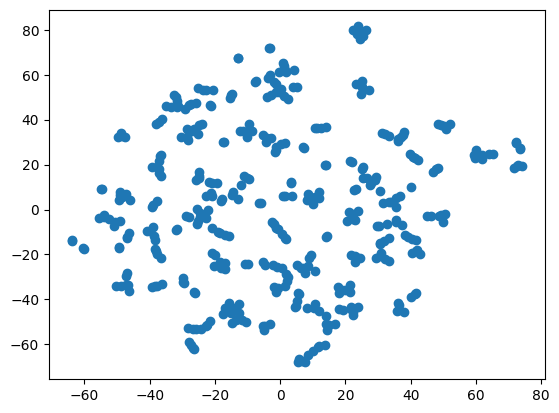

In [15]:
import matplotlib.pyplot as plt

plt.scatter(corpus_embeddings_2d[:,0], corpus_embeddings_2d[:,1])

C:\Users\mokrota\AppData\Local\Temp\ipykernel_15428\193958425.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


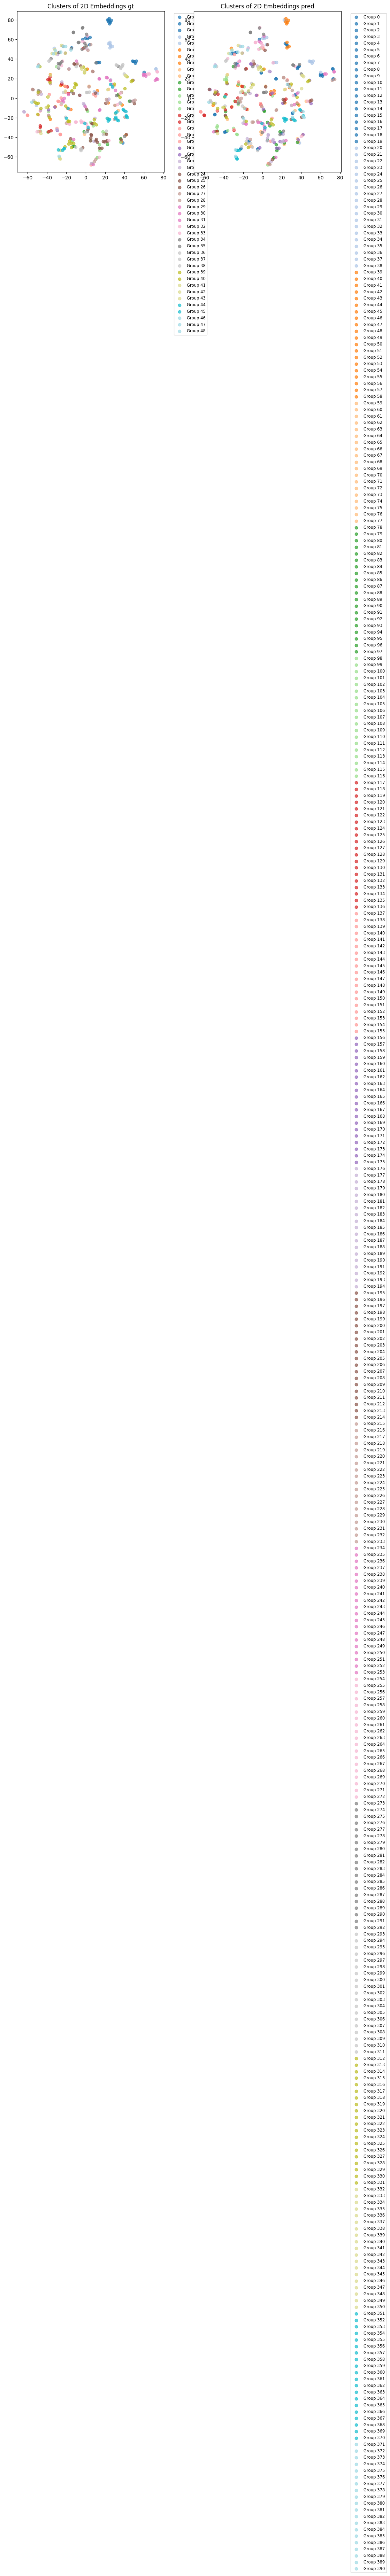

In [16]:
import matplotlib.cm as cm
import numpy as np

colors_pred = cm.tab20(np.linspace(0, 1, len(clusters_ids_pred)))
colors_gt = cm.tab20(np.linspace(0, 1, len(clusters_ids_gt)))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for cluster_ids, colormap, name, id in [(clusters_ids_gt, colors_gt, "gt", 0), (clusters_ids_pred, colors_pred, "pred", 1)]:
    for i, cluster in enumerate(cluster_ids):
        points = corpus_embeddings_2d[cluster]
        ax[id].scatter(points[:, 0], points[:, 1], color=colormap[i], label=f"Group {i}", alpha=0.7)

    ax[id].set_title(f"Clusters of 2D Embeddings {name}")
    ax[id].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()


In [17]:
!pip install --upgrade pip
!pip install --upgrade --force-reinstall nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.24.0-cp312-cp312-win_amd64.whl.metadata (4.2 kB)
  Using cached platformdirs-4.3.7-py3-none-any.whl.metadata (11 kB)
  Using cached pywin32-310-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.21.1-py3-none-any.whl (23 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached jupyter_core-5.7.2-py3-none-any.whl (28 kB)
Us

In [18]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.cm as cm

# Generate colormaps for predicted and ground truth clusters
colors_pred = cm.tab20(np.linspace(0, 1, len(clusters_ids_pred)))
colors_gt = cm.tab20(np.linspace(0, 1, len(clusters_ids_gt)))

# Convert matplotlib colormap (RGBA) to Plotly-friendly hex
def rgba_to_hex(rgba):
    r, g, b, _ = (int(255 * x) for x in rgba)
    return f'#{r:02x}{g:02x}{b:02x}'

colors_pred = [rgba_to_hex(c) for c in colors_pred]
colors_gt = [rgba_to_hex(c) for c in colors_gt]

# Create subplots with two columns
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Clusters of 2D Embeddings gt", "Clusters of 2D Embeddings pred"))

# Add traces for ground truth
for i, cluster in enumerate(clusters_ids_gt):
    points = corpus_embeddings_2d[cluster]
    fig.add_trace(
        go.Scatter(
            x=points[:, 0],
            y=points[:, 1],
            mode='markers',
            marker=dict(color=colors_gt[i], size=6),
            name=f"GT Group {i}",
            legendgroup="gt",
            showlegend=False  # Toggle to True if you want legends per group
        ),
        row=1, col=1
    )

# Add traces for predicted clusters
for i, cluster in enumerate(clusters_ids_pred):
    points = corpus_embeddings_2d[cluster]
    fig.add_trace(
        go.Scatter(
            x=points[:, 0],
            y=points[:, 1],
            mode='markers',
            marker=dict(color=colors_pred[i], size=6),
            name=f"Pred Group {i}",
            legendgroup="pred",
            showlegend=False
        ),
        row=1, col=2
    )

fig.update_layout(
    height=600,
    width=1000,
    title_text="Cluster Comparison: Ground Truth vs Prediction",
    showlegend=True
)

fig.show()


In [ ]:
labels_pred = []
labels_gt = []

for ind, cluster in enumerate(clusters_ids_gt):
    for s_id in cluster:
        labels_gt.append([ind, s_id])
labels_gt = sorted(labels_gt, key=lambda x: x[1])
print(labels_gt)
labels_gt = list(map(lambda x: x[0], labels_gt))

for ind, cluster in enumerate(clusters_ids_pred):
    for s_id in cluster:
        labels_pred.append([ind, s_id])
labels_pred = sorted(labels_pred, key=lambda x: x[1])
labels_pred = list(map(lambda x: x[0], labels_pred))

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [2, 17], [2, 18], [2, 19], [2, 20], [2, 21], [2, 22], [2, 23], [2, 24], [3, 25], [3, 26], [3, 27], [3, 28], [3, 29], [3, 30], [3, 31], [4, 32], [4, 33], [4, 34], [4, 35], [4, 36], [4, 37], [4, 38], [5, 39], [5, 40], [6, 41], [6, 42], [7, 43], [7, 44], [7, 45], [7, 46], [7, 47], [7, 48], [7, 49], [7, 50], [7, 51], [7, 52], [7, 53], [8, 54], [8, 55], [8, 56], [8, 57], [8, 58], [9, 59], [9, 60], [9, 61], [10, 62], [10, 63], [10, 64], [11, 65], [11, 66], [11, 67], [11, 68], [12, 69], [12, 70], [12, 71], [12, 72], [12, 73], [12, 74], [13, 75], [13, 76], [13, 77], [13, 78], [13, 79], [13, 80], [13, 81], [13, 82], [13, 83], [13, 84], [13, 85], [13, 86], [14, 87], [14, 88], [14, 89], [14, 90], [14, 91], [14, 92], [15, 93], [15, 94], [15, 95], [15, 96], [15, 97], [15, 98], [15, 99], [16, 100], [16, 101], [16, 102], [16, 103], [16, 104], [16, 105], [17, 

0.9740268767377201

In [31]:
from sklearn import metrics

rand_ind_score = metrics.rand_score(labels_pred, labels_gt)
ad_rand_ind_score = metrics.adjusted_rand_score(labels_pred, labels_gt)

In [32]:
rand_ind_score, ad_rand_ind_score

(0.9740268767377201, 0.01669919195130927)